# Data Simulation

## configuration

In [1]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.electrocardiogram.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.datasets.electrocardiogram.html
from scipy.misc import electrocardiogram # deprecated since version 1.10.0 - use scipy.datasets.electrocardiogram

import numpy as np
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
from matplotlib import pyplot as plt

# https://neuropsychology.github.io/NeuroKit/
import neurokit2 as nk

## data preparation to simulate signal composition

In [2]:
def plot_ecg(x, y, title):
    plt.figure(figsize=(18,6))
    plt.title(title) 
    plt.xlabel('time') 
    plt.ylabel('value') 
    plt.plot(x, y) 
    plt.show()

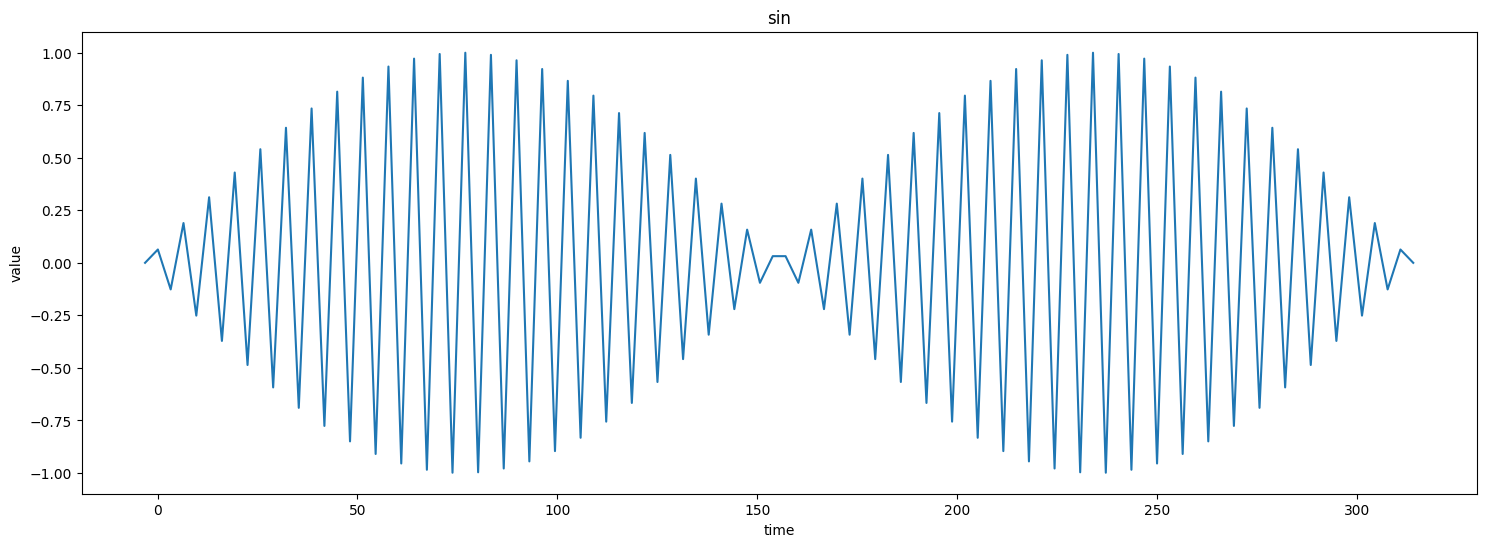

In [3]:
x = np.linspace(-np.pi, np.pi*100, 100)
ecg1 = np.sin(x)
plot_ecg(x, ecg1, 'sin')

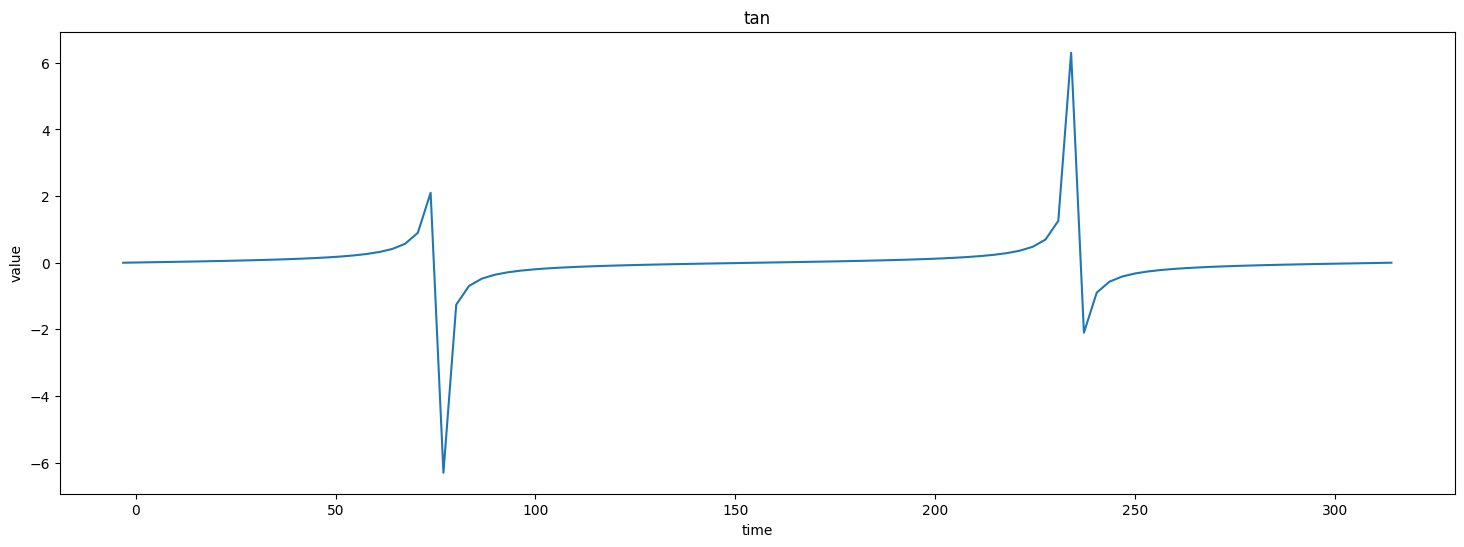

In [4]:
x = np.linspace(-np.pi, np.pi*100, 100)
ecg2 = np.tan(x) / 10
plot_ecg(x, ecg2, 'tan')

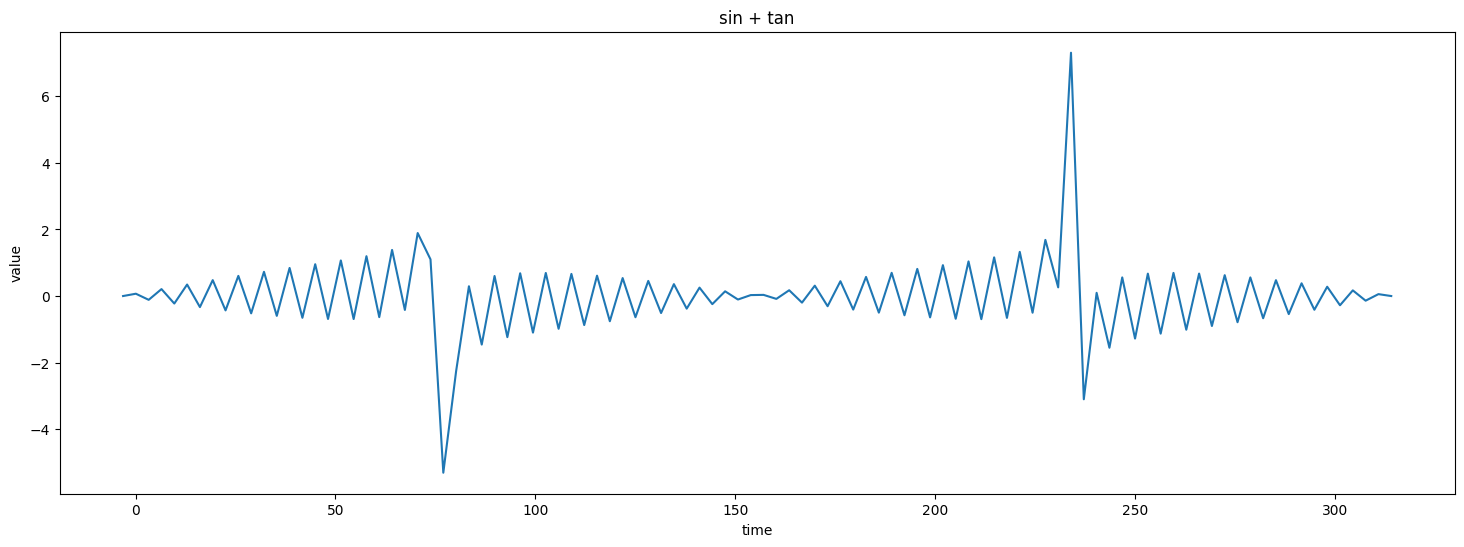

In [5]:
composition = ecg1 + ecg2
plot_ecg(x, composition, 'sin + tan')

## data preparation with scipy and numpy

In [6]:
ecg0 = electrocardiogram()
ecg0

array([-0.245, -0.215, -0.185, ..., -0.405, -0.395, -0.385])

In [7]:
length = len(ecg0)
length

108000

### add noise on values

In [8]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
mu, sigma = 0, 0.01
noise = np.random.normal(mu, sigma, [1, length])
noise

array([[-0.0112887 ,  0.01500062,  0.00320006, ..., -0.00307053,
        -0.01681499,  0.00758307]])

In [9]:
len(noise[0])

108000

In [10]:
ecg2 = ecg0 + noise[0]
ecg2

array([-0.2562887 , -0.19999938, -0.18179994, ..., -0.40807053,
       -0.41181499, -0.37741693])

### add noise with distension

In [11]:
ecg1 = ecg0.copy()
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
positions = np.random.randint(800, 9000, 100)
# https://numpy.org/doc/stable/reference/generated/numpy.nditer.html
positions_it = np.nditer(positions, flags=['f_index'])
insertions = np.random.randint(500, 1000, 100)
index = 0
while index < length:
    for position in positions_it:
        if index + insertions[positions_it.index] < length:
            insertion = noise[0][index:index+insertions[positions_it.index]] + ecg1[index]
            # https://numpy.org/doc/stable/reference/generated/numpy.insert.html
            ecg1 = np.insert(ecg1, index, insertion)
            index = index + position
ecg1 = ecg1[0:length]
len(ecg1)

108000

### data visualization

In [12]:
def plot_ecg(y, title):
    plt.figure(figsize=(18,6))
    x = np.arange(0, len(y)) 
    plt.title(title) 
    plt.xlabel('time') 
    plt.ylabel('value') 
    plt.plot(x, y) 
    plt.show()

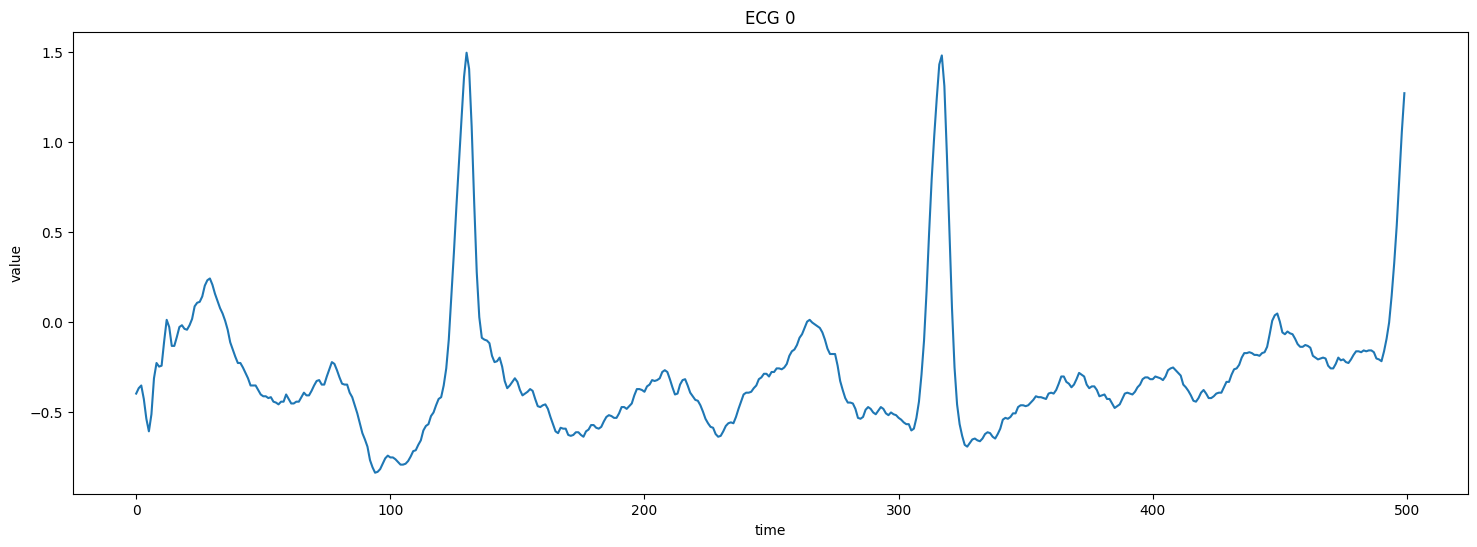

In [13]:
plot_ecg(ecg0[1000:1500], 'ECG 0')

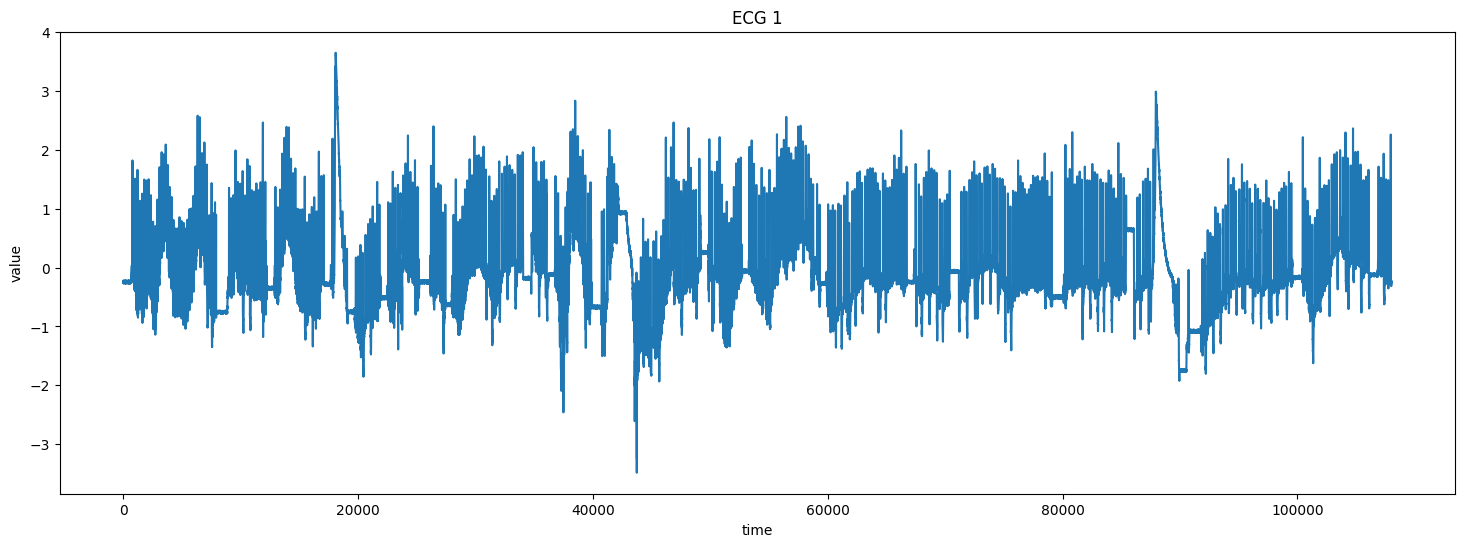

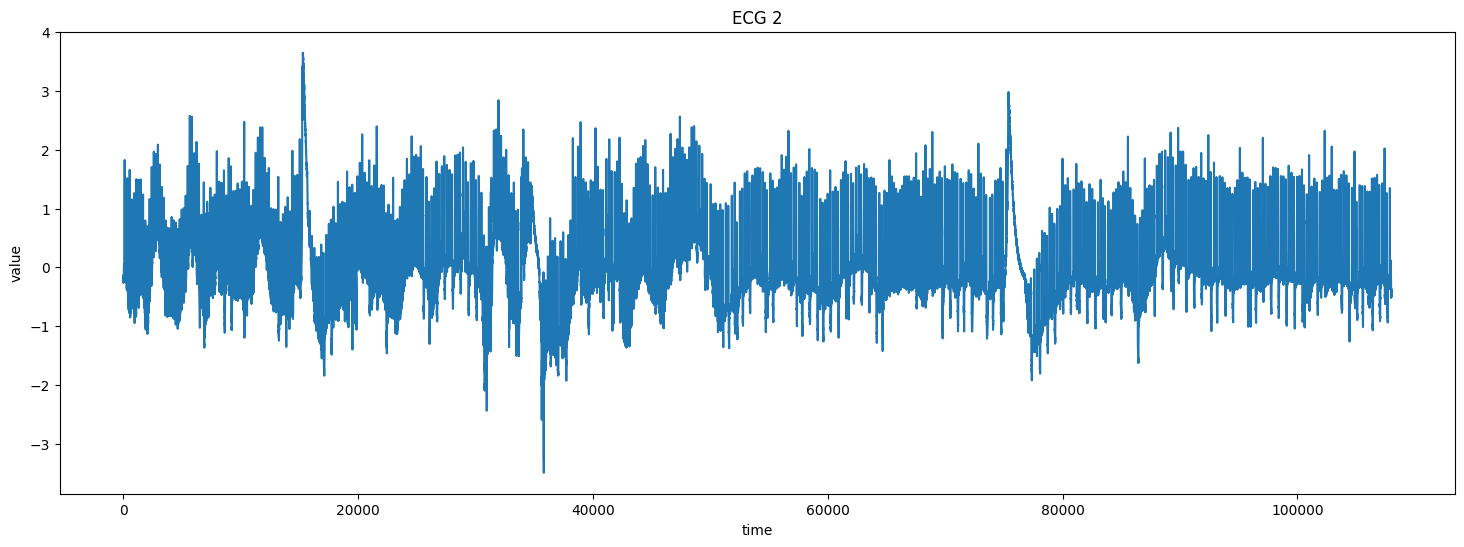

In [14]:
plot_ecg(ecg1, 'ECG 1')
plot_ecg(ecg2, 'ECG 2')

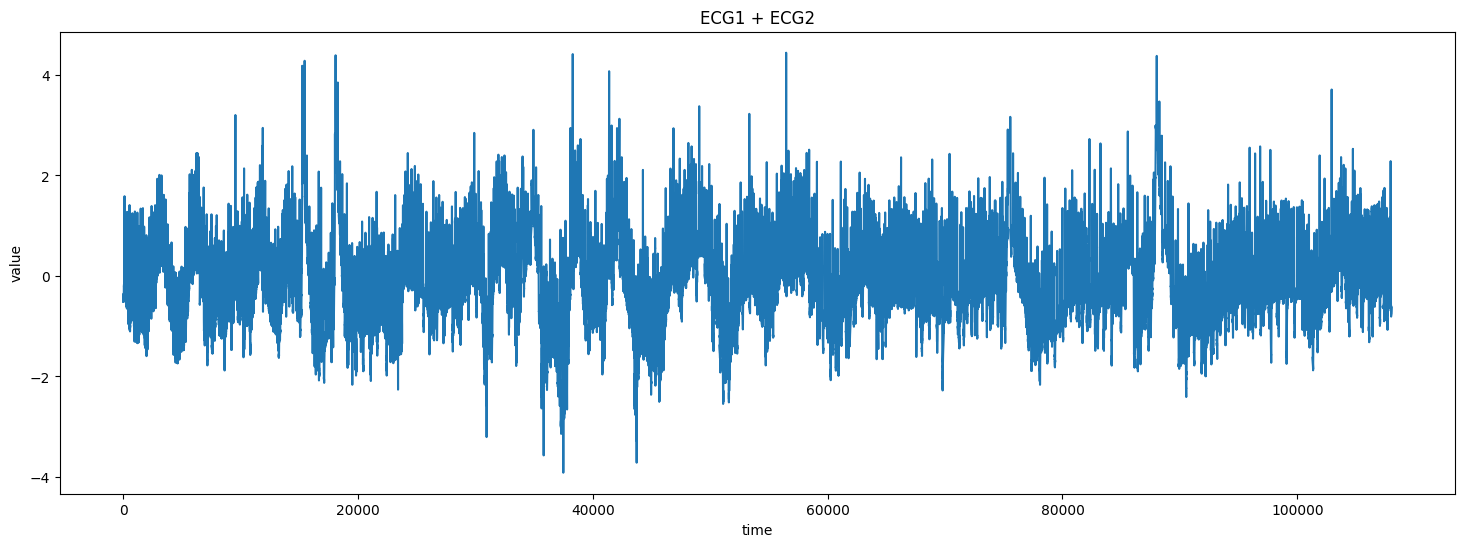

In [15]:
composition = ecg1 + ecg2
plot_ecg(composition, 'ECG1 + ECG2')

## data preparation with neurokit2

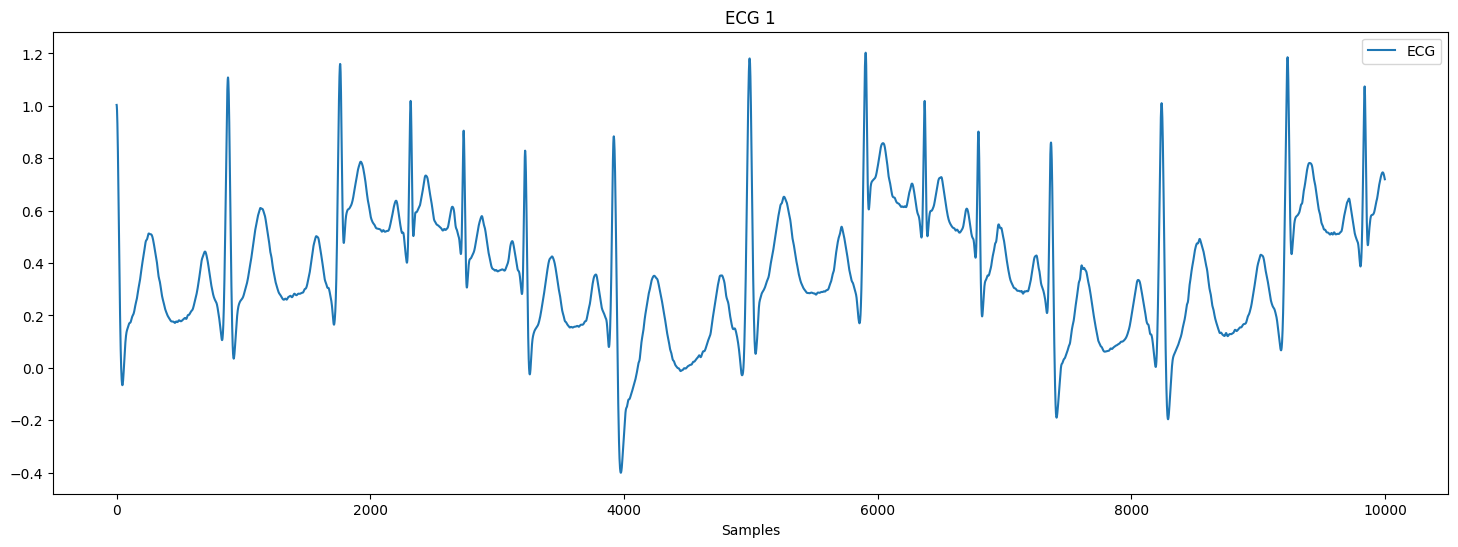

In [16]:
ecg1 = nk.ecg_simulate(duration=10, heart_rate=80, heart_rate_std=20)
nk.signal_plot(ecg1, labels='ECG', figsize=(18,6), title='ECG 1')

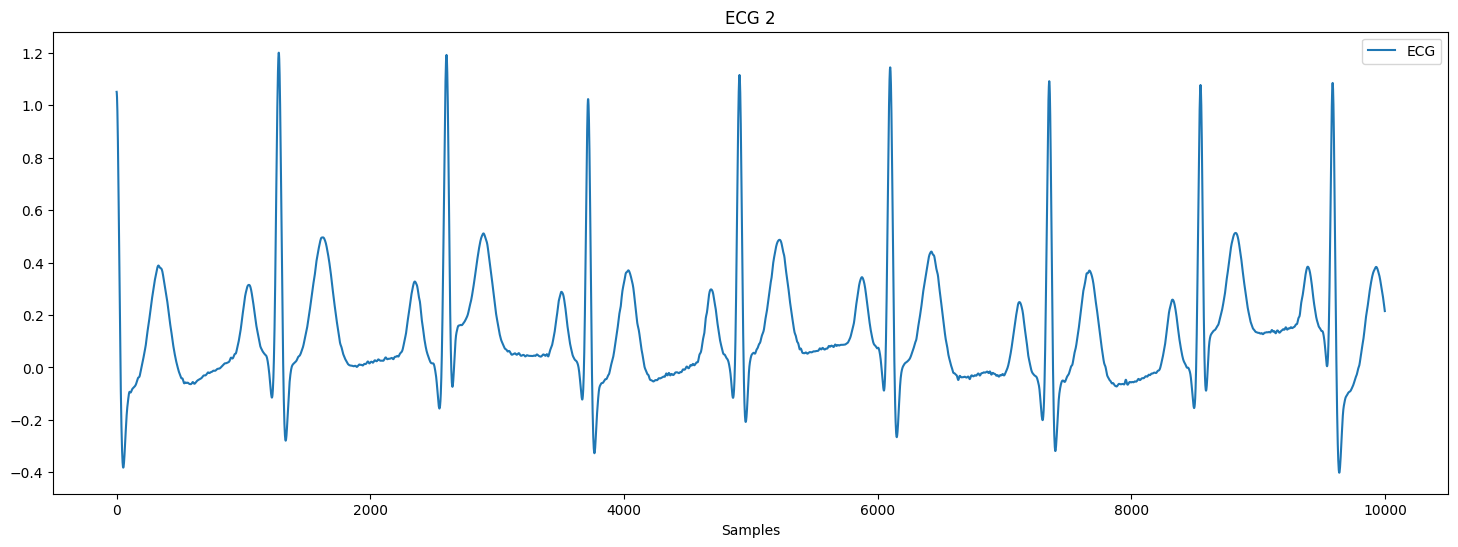

In [17]:
ecg2 = nk.ecg_simulate(duration=10, heart_rate=50, heart_rate_std=5)
nk.signal_plot(ecg2, labels='ECG', figsize=(18,6), title='ECG 2')

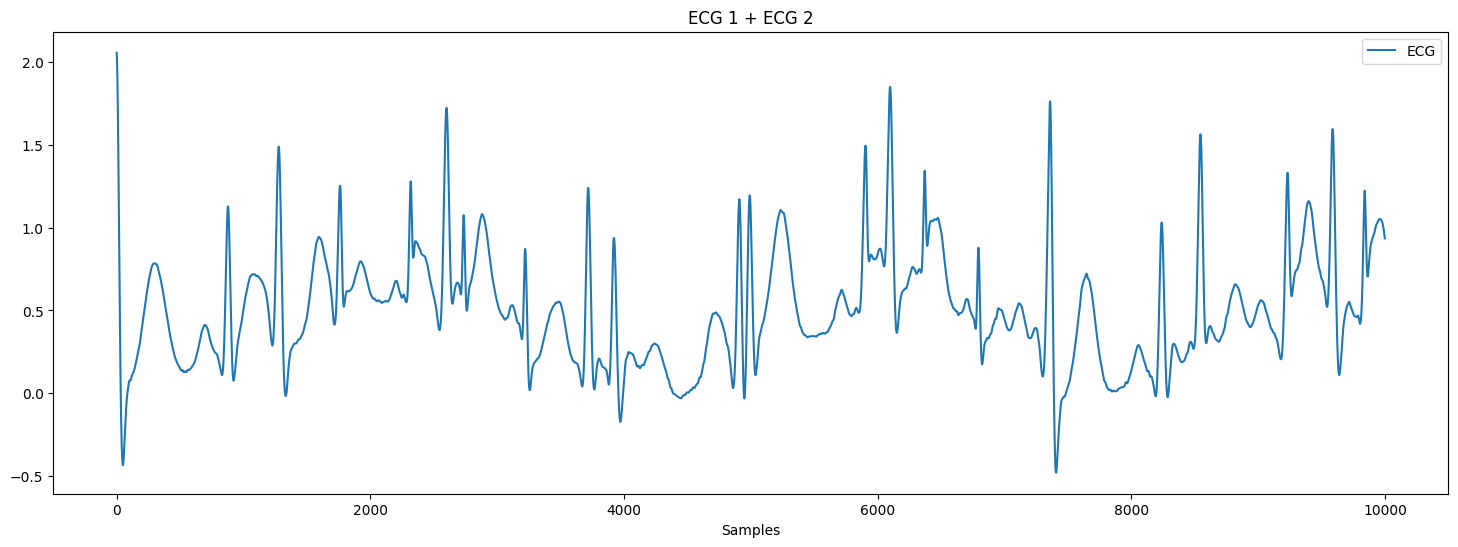

In [18]:
composition = ecg1 + ecg2
nk.signal_plot(composition, labels='ECG', figsize=(18,6), title='ECG 1 + ECG 2')